# 1. EDA

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns
from ydata_profiling import ProfileReport
from scipy import stats
from scipy import special

pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 100)

df_train = pd.read_csv("train_test_submission/train.csv")
df_train_Id = df_train["Id"]
df_train = df_train.drop("Id", axis=1)

df_test = pd.read_csv("train_test_submission/test.csv")
df_test_Id = df_test["Id"]
df_test = df_test.drop("Id", axis=1)

df_all_data = pd.concat([df_train, df_test])

print(f"{df_train.shape=}")
display(df_train.head(5))
print(f"{df_test.shape=}")
display(df_test.head(5))

print("-" * 10, "df_train.info()", "-" * 10)
print(df_train.info())
print("\n", "-" * 10, "df_test.info()", "-" * 10)
print(df_test.info())



# ydata_profilingを使う場合。時間かかるので注意
# minimal=Falseにすると更に時間がかかり、出力されるhtmlも非常に重くなるなので注意

if not os.path.exists("ydata_profiling"):
    os.makedirs("ydata_profiling")

profile = ProfileReport(df_all_data, minimal=True)
profile_path = "ydata_profiling/kaggle_houseprices_minimal.html"
profile.to_file(profile_path)

print(f"{profile_path}にレポートが出力されました。")

df_train.shape=(1460, 80)


MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave   NaN      Reg   
1          20       RL         80.0     9600   Pave   NaN      Reg   
2          60       RL         68.0    11250   Pave   NaN      IR1   
3          70       RL         60.0     9550   Pave   NaN      IR1   
4          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd             7        Typ           

df_test.shape=(1459, 79)


MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          20       RH         80.0    11622   Pave   NaN      Reg   
1          20       RL         81.0    14267   Pave   NaN      IR1   
2          60       RL         74.0    13830   Pave   NaN      IR1   
3          60       RL         78.0     9978   Pave   NaN      IR1   
4         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            6       1961   
1       Norm     1Fam     1Story            6            6       1958   
2       Norm     1Fam     2Story            5            5       1997   
3       Norm     1Fam     2Story            6            6       1998   
4       Norm   TwnhsE     1Story            8            5       1992   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1961     Gable  CompShg     VinylSd     VinylSd        NaN   
1          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2          1998     Gable  CompShg     VinylSd     VinylSd        NaN   
3          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4          1992     Gable  CompShg     HdBoard     HdBoard        NaN   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       TA       TA           No   
1       108.0        TA        TA     CBlock       TA       TA           No   
2         0.0        TA        TA      PConc       Gd       TA           No   
3        20.0        TA        TA      PConc       TA       TA           No   
4         0.0        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          Rec       468.0          LwQ       144.0      270.0        882.0   
1          ALQ       923.0          Unf         0.0      406.0       1329.0   
2          GLQ       791.0          Unf         0.0      137.0        928.0   
3          GLQ       602.0          Unf         0.0      324.0        926.0   
4          ALQ       263.0          Unf         0.0     1017.0       1280.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       896         0             0   
1    GasA        TA          Y      SBrkr      1329         0             0   
2    GasA        Gd          Y      SBrkr       928       701             0   
3    GasA        Ex          Y      SBrkr       926       678             0   
4    GasA        Ex          Y      SBrkr      1280         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        896           0.0           0.0         1         0             2   
1       1329           0.0           0.0         1         1             3   
2       1629           0.0           0.0         2         1             3   
3       1604           0.0           0.0         2         1             3   
4       1280           0.0           0.0         2         0             2   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           0         NaN   
1             1          Gd             6        Typ           0         NaN   
2             1          TA             6        Typ           1          TA   
3             1          Gd             7        Typ           

---------- df_train.info() ----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond   

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

ydata_profiling/kaggle_houseprices_minimal.htmlにレポートが出力されました。


---------- df_train["SalePrice"].describe() ----------
count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64
skewness_SalePrice=1.8828757597682129
kurtosis_SalePrice=6.536281860064529


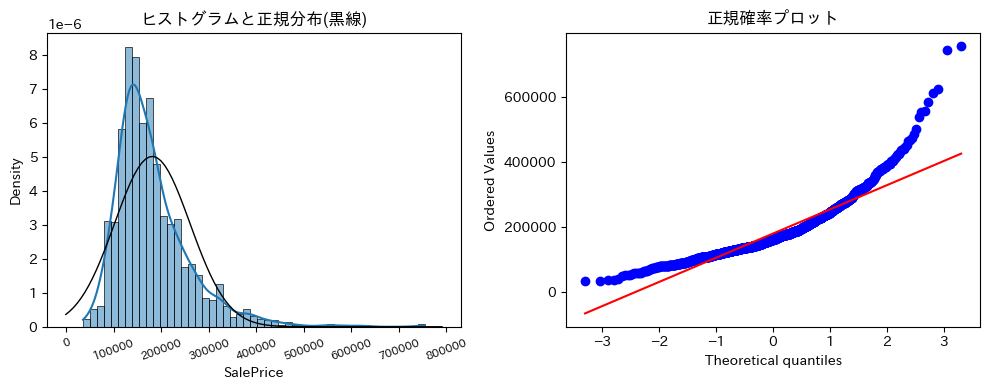

In [ ]:
SalePrice = df_train["SalePrice"]

skewness_SalePrice = SalePrice.skew()
kurtosis_SalePrice = SalePrice.kurtosis()

print("-" * 10, 'df_train["SalePrice"].describe()', "-" * 10)
print(df_train["SalePrice"].describe())

print(f"{skewness_SalePrice=}")
print(f"{kurtosis_SalePrice=}")

# plotlyではkdeを描写するのが面倒なのでseabornで描写
fig, ax = plt.subplots(1, 2,figsize=(10, 4))

sns.histplot(SalePrice, stat="density", kde=True, ax=ax[0])
ax[0].set_title("ヒストグラムと正規分布(黒線)")
ax[0].tick_params(axis="x", labelsize=8, rotation=20)

xmin, xmax = ax[0].get_xlim()
x = np.linspace(xmin, xmax, 100)
y_norm = stats.norm.pdf(x, np.mean(SalePrice), np.std(SalePrice))
ax[0].plot(x, y_norm, "k", linewidth=1)

stats.probplot(SalePrice, plot=ax[1])
ax[1].set_title("正規確率プロット")

plt.tight_layout()
plt.show()

In [5]:
df_all_data_features = df_all_data.drop(["SalePrice"], axis=1)
numeric_features = df_all_data_features.select_dtypes(include="number").columns


df_skew_kurt = pd.DataFrame({
    "Feature": numeric_features,
    "Skewness": [stats.skew(df_all_data_features[col], nan_policy="omit") for col in numeric_features],
    "Kurtosis": [stats.kurtosis(df_all_data_features[col], nan_policy="omit") for col in numeric_features]
})

display(df_skew_kurt.sort_values(by="Skewness", ascending=False).head(10))

Feature   Skewness    Kurtosis
33        MiscVal  21.947195  563.106778
32       PoolArea  16.898328  298.119801
2         LotArea  12.822431  264.496632
14   LowQualFinSF  12.088761  174.631256
30      3SsnPorch  11.376065  149.151976
21   KitchenAbvGr   4.302254   19.742020
9      BsmtFinSF2   4.145323   18.802223
29  EnclosedPorch   4.003891   28.327268
31    ScreenPorch   3.946694   17.744213
17   BsmtHalfBath   3.929996   14.820584

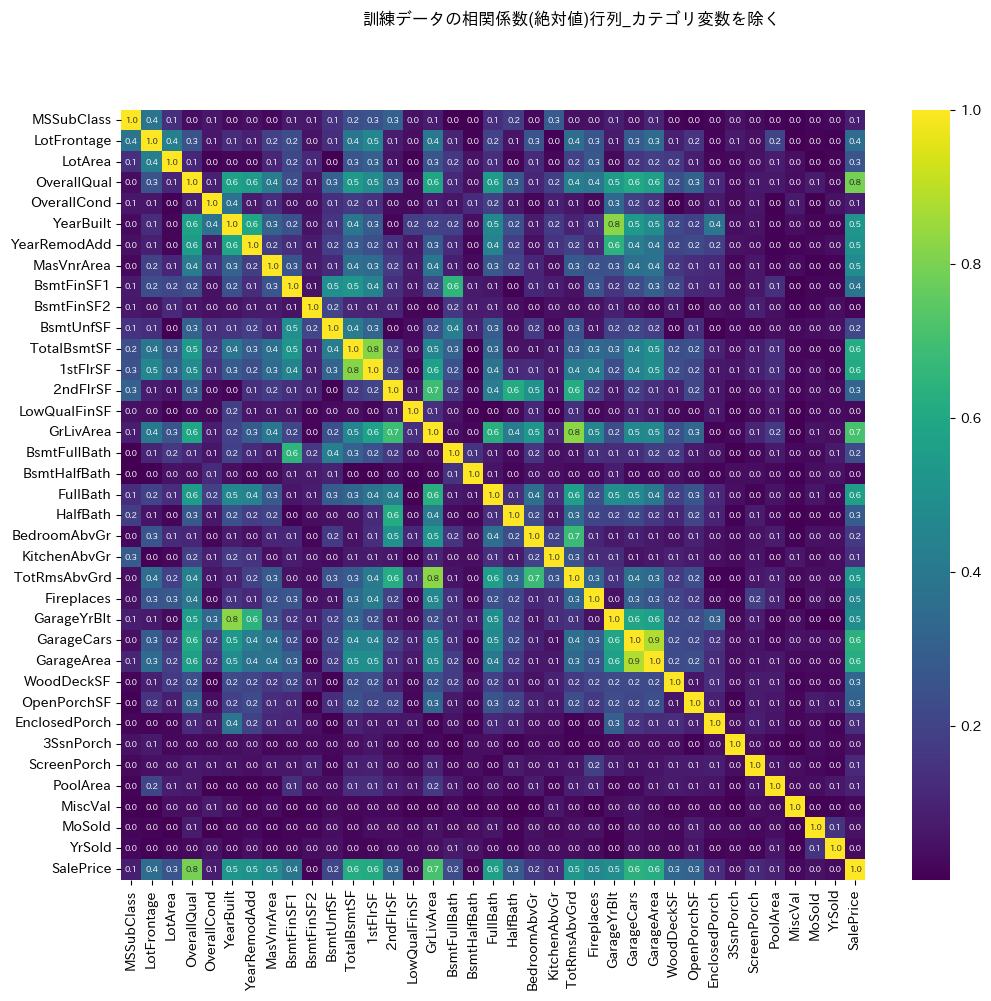

In [6]:
corr_matrix = df_train.corr(numeric_only=True)
"""
    訓練データdf_trainの相関係数行列
    corr_matrix = df_train.corr(numeric_only=True)
"""

plt.figure(figsize=(12, 10))
sns.heatmap(abs(corr_matrix), cmap="viridis", annot=True, fmt=".1f", annot_kws={"fontsize": 6})

plt.suptitle("訓練データの相関係数(絶対値)行列_カテゴリ変数を除く")
plt.show()

In [7]:
# plotly版。インデックス番号が一目で確認できる

import plotly.express as px
import plotly.subplots as sp

threshold = 0.6
high_corr_cols = (
    corr_matrix["SalePrice"][abs(corr_matrix["SalePrice"]) >= threshold]
    .sort_values(ascending=False)
    .index
).drop("SalePrice")

# プロットのサイズを指定
plot_size = len(high_corr_cols)
rows = plot_size // 3 + 1  # 行数
cols = 3  # 列数

# サブプロットの作成
fig = sp.make_subplots(
    rows=rows, 
    cols=cols, 
    subplot_titles=[f"{col} vs SalePrice （相関係数{corr_matrix["SalePrice"][col]:.3f}）" for col in high_corr_cols],
    horizontal_spacing=0.05,
    vertical_spacing=0.1,
    )

# high_corr_colsにある特徴量ごとに散布図を描く
for i, col in enumerate(high_corr_cols):
    row = i // cols + 1
    col_num = i % cols + 1
    scatter = px.scatter(df_train, x=col, y="SalePrice", opacity=0.3, hover_data=[df_train.index])
    for trace in scatter.data:
        fig.add_trace(trace, row=row, col=col_num)
    fig.update_annotations()

# グラフのタイトルを設定
fig.update_layout(
    title_text=f"SalePriceとの相関係数の絶対値が{threshold}以上の特徴量についての散布図",
    showlegend=False,
    height=400 * rows,
    width=1200,
)

# グラフの表示
fig.show()

# レイアウト調節 https://data-analytics.fun/2021/06/19/plotly-subplots/

# 2. 前処理

## 外れ値処理

In [8]:
# 外れ値処理(訓練データ)
# 外れ値のインデックス番号は、plotlyで描いたグラフから得た
df_train_befdrop = df_train
df_train = df_train.drop(df_train.index[[523, 1298]])

fig = px.scatter(
    df_train, x="GrLivArea", y="SalePrice",
    opacity=0.3,
    hover_data=[df_train.index]
)

fig.update_layout(
    title_text="SalePrice vs GrLivArea. 外れ値処理後",
    showlegend=False,
    height=500,
    width=600
)

# グラフの表示
fig.show()

## 欠損値補完・列削除

In [9]:
# 欠損値処理(訓練データ、テストデータ)
df_all_data = pd.concat([df_train, df_test])

df_missing_values_count = df_all_data.isna().sum()
df_missing_values_table = pd.DataFrame(
    {
        "Missing_count": df_missing_values_count,
        "Percent (%)": round(df_missing_values_count / len(df_all_data) * 100, 2)
    }
).sort_values("Missing_count", ascending=False)

# chatGPTに作ってもらった各特徴量の説明をまとめたcsvを読み込み、欠損値に関する表と結合
df_data_description = pd.read_csv("data_description/data_descripsion_simple_jp.csv", index_col=0)
df_missing_value_description = pd.concat([df_missing_values_table, df_data_description], axis=1)

# csvに出力。これとydata_profilingのレポートを眺めながら各欠損値をどう処理するか考える。
if not os.path.exists("missing_value"):
    os.makedirs("missing_value")
df_missing_value_description.to_csv(
    "missing_value/missing_value_processing.csv", encoding="utf-8_sig"
)

display(df_missing_value_description.head(15))

Missing_count  Percent (%)                     説明
PoolQC               2908.0        99.69                 プールの品質
MiscFeature          2812.0        96.40              その他の特別な機能
Alley                2719.0        93.21              路地アクセスの種類
Fence                2346.0        80.43                フェンスの品質
MasVnrType           1766.0        60.54              石造りの外壁の種類
SalePrice            1459.0        50.02   物件の販売価格（ドル）。予測対象の変数。
FireplaceQu          1420.0        48.68                  暖炉の品質
LotFrontage           486.0        16.66      物件に接続する道路の線形フィート数
GarageFinish          159.0         5.45             ガレージの内装仕上げ
GarageQual            159.0         5.45                ガレージの品質
GarageCond            159.0         5.45                ガレージの状態
GarageYrBlt           159.0         5.45               ガレージの建設年
GarageType            157.0         5.38                ガレージの位置
BsmtCond               82.0         2.81             地下室の全体的な状態
BsmtExposure           82.0         2.81  地下室のウォークアウトやガーデンレベルの壁

In [10]:
# LotFrontageの欠損割合が多いが、何で補完するかが難しい。どれかのカテゴリ変数に対する傾向がないか調べてみる

# object型のデータが入っている列を抽出
object_cols = df_all_data.select_dtypes(include="object").columns

# プロットのサイズを指定
plot_size = len(object_cols)
rows = plot_size // 6 + 1  # 行数
cols = 6  # 列数

# サブプロットの作成
fig = sp.make_subplots(
    rows=rows, 
    cols=cols, 
    subplot_titles=[f"{col} vs LotFrontage" for col in object_cols],
    )

# object_colsにある特徴量ごとに箱ひげ図を描く
for i, col in enumerate(object_cols):
    row = i // cols + 1
    col_num = i % cols + 1
    box = px.box(df_all_data, x=col, y="LotFrontage")
    for trace in box.data:
        fig.add_trace(trace, row=row, col=col_num)
    fig.update_annotations()

# グラフのタイトルを設定
fig.update_layout(
    title_text=f"各カテゴリ変数に対するLotFrontageの箱ひげ図",
    showlegend=False,
    height=400 * rows,
    width=1600,
)

# グラフの表示
fig.show()

In [11]:
# x="Neighborhood", y="LotFrontage"が傾向を捉えていそう。詳しく確認する

fig = px.box(df_all_data, x="Neighborhood", y="LotFrontage")

fig.update_layout(
    # title_text=" ",
    showlegend=False,
    height=500,
    width=1000
)

# グラフの表示
fig.show()

In [12]:
# 各地域"Neighborhood"の"LotFrontage"の中央値で欠損値を補完する

df_medLot_groupby_Neighborhood = df_all_data.groupby(by="Neighborhood")["LotFrontage"].agg("median")

def fillnaLot(row):
    """
    ある1つの住宅データについて、"LotFrontage"列の値が欠損している場合はそのデータの地域（"Neighborhood"）の"LotFrontage"の中央値を返す。
    欠損していない場合、元の値をそのまま返す。

    Args:
        row (pd.Series): "LotFrontage"列の欠損値処理をしたいデータ

    Return
    -------
        "LotFrontage"列が…
            欠損の場合: df_group_LotFrontage[row["Neighborhood"]]
            欠損でない場合: row["LotFrontage"]
    """
    if pd.isna(row["LotFrontage"]):
        return df_medLot_groupby_Neighborhood[row["Neighborhood"]]
    else:
        return row["LotFrontage"]

In [13]:
# LotFrontageの補完
df_all_data["LotFrontage"] = df_all_data.apply(fillnaLot, axis=1)

# "None"で補完
cols_fillNone = [
    "MiscFeature",
    "Alley",
    "Fence",
    "MasVnrType",
    "FireplaceQu",
    "GarageFinish",
    "GarageQual",
    "GarageCond",
    "GarageType",
    "BsmtCond",
    "BsmtExposure",
    "BsmtQual",
    "BsmtFinType2",
    "BsmtFinType1"    
]
# 0で補完
cols_fill0 = [
    "GarageYrBlt",
    "MasVnrArea",
    "BsmtHalfBath",
    "BsmtFullBath",
    "GarageArea",
    "GarageCars",
    "BsmtFinSF1",
    "BsmtFinSF2",
    "BsmtUnfSF",
    "TotalBsmtSF"
]
# 最頻値で補完
cols_fillmode = [
    "MSZoning",
    "Functional",
    "Exterior2nd",
    "Exterior1st",
    "SaleType",
    "KitchenQual",
    "Electrical"
]
# 列削除：PoolQC(99.7%が欠損)、Utilities(99.6%が"allpub")、PoolArea(99.6%が0)
cols_drop = [
    "PoolQC",
    "Utilities",
    "PoolArea"
]

for col in cols_fillNone:
    df_all_data[col] = df_all_data[col].fillna("None")
for col in cols_fill0:
    df_all_data[col] = df_all_data[col].fillna(0)
for col in cols_fillmode:
    df_all_data[col] = df_all_data[col].fillna(df_all_data[col].mode()[0])
df_all_data = df_all_data.drop(columns=cols_drop)

## 新たな特徴量の作成(訓練データ、テストデータ)

In [14]:
# 新しい特徴量の作成
# 'YrBltAndRemod': 'YearBuilt' + 'YearRemodAdd'

df_all_data["TotalSF"] = (
    df_all_data["TotalBsmtSF"]
    + df_all_data["1stFlrSF"] 
    + df_all_data["2ndFlrSF"]
)
df_all_data["TotalFinSF"] = (
    df_all_data["BsmtFinSF1"]
    + df_all_data["BsmtFinSF2"]
    + df_all_data["1stFlrSF"]
    + df_all_data["2ndFlrSF"]
)
df_all_data["TotalBathrooms"] = (
    df_all_data["BsmtFullBath"]
    + 0.5 * df_all_data["BsmtHalfBath"]
    + df_all_data["FullBath"]
    + 0.5 * df_all_data["HalfBath"]
)
df_all_data["TotalPorchSF"] = (
    df_all_data["3SsnPorch"]
    + df_all_data["EnclosedPorch"]
    + df_all_data["OpenPorchSF"]
    + df_all_data["ScreenPorch"]
)

df_all_data["has2ndfloor"] = df_all_data["2ndFlrSF"] > 0
df_all_data["hasGarage"] = df_all_data["GarageArea"] > 0
df_all_data["hasBsmt"] = df_all_data["TotalBsmtSF"] > 0
df_all_data["hasFireplace"] = df_all_data["Fireplaces"] > 0

df_all_data[[
    "TotalSF",
    "TotalFinSF",
    "TotalBathrooms",
    "TotalPorchSF",
    "has2ndfloor",
    "hasGarage",
    "hasBsmt",
    "hasFireplace"    
]].head(5)

TotalSF  TotalFinSF  TotalBathrooms  TotalPorchSF  has2ndfloor  hasGarage  \
0   2566.0      2416.0             3.5            61         True       True   
1   2524.0      2240.0             2.5             0        False       True   
2   2706.0      2272.0             3.5            42         True       True   
3   2473.0      1933.0             2.0           307         True       True   
4   3343.0      2853.0             3.5            84         True       True   

   hasBsmt  hasFireplace  
0     True         False  
1     True          True  
2     True          True  
3     True          True  
4     True          True

## カテゴリ変数のエンコーディング

In [15]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge, Lasso
from lightgbm import LGBMRegressor, plot_tree
from sklearn.metrics import root_mean_squared_error as rmse
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.preprocessing import StandardScaler, PowerTransformer

# 1. カテゴリごとのユニークな値を取得
category_mappings = {col: set(df_all_data[col].dropna().unique()) for col in df_all_data.select_dtypes(include=['object', 'category']).columns}

# 2. 同じカテゴリーリストを持つ変数をグループ化
from collections import defaultdict

grouped_categories = defaultdict(list)
for col, categories in category_mappings.items():
    grouped_categories[frozenset(categories)].append(col)

# 結果の表示
for categories, columns in grouped_categories.items():
    print("カテゴリーリスト:", categories)
    print("同じマッピングを持つ変数:", columns)
    print()

カテゴリーリスト: frozenset({'RL', 'C (all)', 'FV', 'RH', 'RM'})
同じマッピングを持つ変数: ['MSZoning']

カテゴリーリスト: frozenset({'Pave', 'Grvl'})
同じマッピングを持つ変数: ['Street']

カテゴリーリスト: frozenset({'None', 'Pave', 'Grvl'})
同じマッピングを持つ変数: ['Alley']

カテゴリーリスト: frozenset({'IR1', 'Reg', 'IR3', 'IR2'})
同じマッピングを持つ変数: ['LotShape']

カテゴリーリスト: frozenset({'Low', 'HLS', 'Bnk', 'Lvl'})
同じマッピングを持つ変数: ['LandContour']

カテゴリーリスト: frozenset({'CulDSac', 'FR2', 'Corner', 'Inside', 'FR3'})
同じマッピングを持つ変数: ['LotConfig']

カテゴリーリスト: frozenset({'Gtl', 'Mod', 'Sev'})
同じマッピングを持つ変数: ['LandSlope']

カテゴリーリスト: frozenset({'Sawyer', 'Somerst', 'Edwards', 'Veenker', 'NWAmes', 'Crawfor', 'SawyerW', 'Mitchel', 'Blmngtn', 'SWISU', 'Gilbert', 'NridgHt', 'ClearCr', 'Blueste', 'OldTown', 'CollgCr', 'NPkVill', 'IDOTRR', 'StoneBr', 'NoRidge', 'BrkSide', 'NAmes', 'Timber', 'MeadowV', 'BrDale'})
同じマッピングを持つ変数: ['Neighborhood']

カテゴリーリスト: frozenset({'Artery', 'PosN', 'Feedr', 'RRAe', 'RRNe', 'PosA', 'RRNn', 'Norm', 'RRAn'})
同じマッピングを持つ変数: ['Condition1']

カテゴリーリ

In [16]:
# 変換前
display(df_all_data.head(5))

# 順序を定義する
mapping = {
    'ExterQual': ['Fa', 'TA', 'Gd', 'Ex'],
    'KitchenQual': ['Fa', 'TA', 'Gd', 'Ex'],
    'ExterCond': ['Po', 'Fa', 'TA', 'Gd'],
    'HeatingQC': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'BsmtQual': ['None', 'Fa', 'TA', 'Gd', 'Ex'],
    'BsmtCond': ['None', 'Po', 'Fa', 'TA', 'Gd'],
    'FireplaceQu': ['None', 'Fa', 'TA', 'Gd', 'Ex'],
    'GarageQual': ['None', 'Fa', 'TA', 'Gd', 'Ex'],
    'GarageCond': ['None', 'Po', 'TA', 'Gd', 'Ex'],
    'BsmtExposure': ['None', 'No', 'Mn', 'Av', 'Gd'],
    'BsmtFinType1': ['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
    'BsmtFinType2': ['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
    'GarageFinish': ['None', 'Unf', 'RFn', 'Fin']
}

# 各変数を順序付きでエンコード
for col, order in mapping.items():
    df_all_data[col] = df_all_data[col].astype(pd.CategoricalDtype(categories=order, ordered=True))

# Ordinal encodingに変換
df_all_data = df_all_data.apply(lambda x: x.cat.codes if x.dtype.name == 'category' else x)

# 結果を表示
display(df_all_data.head(5))

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave  None      Reg   
1          20       RL         80.0     9600   Pave  None      Reg   
2          60       RL         68.0    11250   Pave  None      IR1   
3          70       RL         60.0     9550   Pave  None      IR1   
4          60       RL         84.0    14260   Pave  None      IR1   

  LandContour LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0         Lvl    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1         Lvl       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2         Lvl    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3         Lvl    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4         Lvl       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     2Story            7            5       2003          2003     Gable   
1     1Story            6            8       1976          1976     Gable   
2     2Story            7            5       2001          2002     Gable   
3     2Story            7            5       1915          1970     Gable   
4     2Story            8            5       2000          2000     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1  CompShg     MetalSd     MetalSd       None         0.0        TA        TA   
2  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3  CompShg     Wd Sdng     Wd Shng       None         0.0        TA        TA   
4  CompShg     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ       706.0   
1     CBlock       Gd       TA           Gd          ALQ       978.0   
2      PConc       Gd       TA           Mn          GLQ       486.0   
3     BrkTil       TA       Gd           No          ALQ       216.0   
4      PConc       Gd       TA           Av          GLQ       655.0   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf         0.0      150.0        856.0    GasA        Ex   
1          Unf         0.0      284.0       1262.0    GasA        Ex   
2          Unf         0.0      434.0        920.0    GasA        Ex   
3          Unf         0.0      540.0        756.0    GasA        Gd   
4          Unf         0.0      490.0       1145.0    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       856       854             0       1710   
1          Y      SBrkr      1262         0             0       1262   
2          Y      SBrkr       920       866             0       1786   
3          Y      SBrkr       961       756             0       1717   
4          Y      SBrkr      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0           1.0           0.0         2         1             3             1   
1           0.0           1.0         2         0             3             1   
2           1.0           0.0         2         1             3             1   
3           1.0           0.0         1         0             3             1   
4           1.0           0.0         2         1             4             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  \
0          Gd             8        Typ           0        None     Attchd   
1          TA             6        Typ           1          TA     Attchd   
2          Gd             6        Typ           1          TA     Attchd   
3          Gd             7        Typ           1 

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave  None      Reg   
1          20       RL         80.0     9600   Pave  None      Reg   
2          60       RL         68.0    11250   Pave  None      IR1   
3          70       RL         60.0     9550   Pave  None      IR1   
4          60       RL         84.0    14260   Pave  None      IR1   

  LandContour LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0         Lvl    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1         Lvl       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2         Lvl    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3         Lvl    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4         Lvl       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     2Story            7            5       2003          2003     Gable   
1     1Story            6            8       1976          1976     Gable   
2     2Story            7            5       2001          2002     Gable   
3     2Story            7            5       1915          1970     Gable   
4     2Story            8            5       2000          2000     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea  ExterQual  \
0  CompShg     VinylSd     VinylSd    BrkFace       196.0          2   
1  CompShg     MetalSd     MetalSd       None         0.0          1   
2  CompShg     VinylSd     VinylSd    BrkFace       162.0          2   
3  CompShg     Wd Sdng     Wd Shng       None         0.0          1   
4  CompShg     VinylSd     VinylSd    BrkFace       350.0          2   

   ExterCond Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  \
0          2      PConc         3         3             1             6   
1          2     CBlock         3         3             4             5   
2          2      PConc         3         3             2             6   
3          2     BrkTil         2         4             1             5   
4          2      PConc         3         3             3             6   

   BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating  \
0       706.0             1         0.0      150.0        856.0    GasA   
1       978.0             1         0.0      284.0       1262.0    GasA   
2       486.0             1         0.0      434.0        920.0    GasA   
3       216.0             1         0.0      540.0        756.0    GasA   
4       655.0             1         0.0      490.0       1145.0    GasA   

   HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0          4          Y      SBrkr       856       854             0   
1          4          Y      SBrkr      1262         0             0   
2          4          Y      SBrkr       920       866             0   
3          3          Y      SBrkr       961       756             0   
4          4          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710           1.0           0.0         2         1             3   
1       1262           0.0           1.0         2         0             3   
2       1786           1.0           0.0         2         1             3   
3       1717           1.0           0.0         1         0             3   
4       2198           1.0           0.0         2         1             4   

   KitchenAbvGr  KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
0             1            2             8        Typ           0   
1             1            1             6        Typ           1   
2             1            2             6        Typ           1   
3             1            2             7        Typ           1   
4             1            2             9        

In [17]:
# 残りのカテゴリ変数をone-hot encodingする

# object型のデータが入っている列を抽出
object_cols = df_all_data.select_dtypes(include="object").columns

# one-hot encoding
df_all_data = pd.get_dummies(df_all_data).reset_index(drop=True)

display(df_all_data)

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0             60         65.0     8450            7            5       2003   
1             20         80.0     9600            6            8       1976   
2             60         68.0    11250            7            5       2001   
3             70         60.0     9550            7            5       1915   
4             60         84.0    14260            8            5       2000   
...          ...          ...      ...          ...          ...        ...   
2912         160         21.0     1936            4            7       1970   
2913         160         21.0     1894            4            5       1970   
2914          20        160.0    20000            5            7       1960   
2915          85         62.0    10441            5            5       1992   
2916          60         74.0     9627            7            5       1993   

      YearRemodAdd  MasVnrArea  ExterQual  ExterCond  BsmtQual  BsmtCond  \
0             2003       196.0          2          2         3         3   
1             1976         0.0          1          2         3         3   
2             2002       162.0          2          2         3         3   
3             1970         0.0          1          2         2         4   
4             2000       350.0          2          2         3         3   
...            ...         ...        ...        ...       ...       ...   
2912          1970         0.0          1          2         2         3   
2913          1970         0.0          1          2         2         3   
2914          1996         0.0          1          2         2         3   
2915          1992         0.0          1          2         3         3   
2916          1994        94.0          1          2         3         3   

      BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0                1             6       706.0             1         0.0   
1                4             5       978.0             1         0.0   
2                2             6       486.0             1         0.0   
3                1             5       216.0             1         0.0   
4                3             6       655.0             1         0.0   
...            ...           ...         ...           ...         ...   
2912             1             1         0.0             1         0.0   
2913             1             3       252.0             1         0.0   
2914             1             5      1224.0             1         0.0   
2915             3             6       337.0             1         0.0   
2916             3             2       758.0             1         0.0   

      BsmtUnfSF  TotalBsmtSF  HeatingQC  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0         150.0        856.0          4       856       854             0   
1         284.0       1262.0          4      1262         0             0   
2         434.0        920.0          4       920       866             0   
3         540.0        756.0          3       961       756             0   
4         490.0       1145.0          4      1145      1053             0   
...         ...          ...        ...       ...       ...           ...   
2912      546.0        546.0          3       546       546             0   
2913      294.0        546.0          2       546       546             0   
2914        0.0       1224.0          4      1224         0             0   
2915      575.0        912.0          2       970         0             0   
2916      238.0        996.0          4       996      1004             0   

      GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0          1710           1.0           0.0         2         1             3   
1          1262           0.0           1.0         2         0             3   
2          1786           1.0           0.0         2         1             3   
3     

## 数値変換(目的変数、特徴量)

boxcox前
stats.skew(SalePrice)=1.8793604459195012
stats.kurtosis(SalePrice)=6.496606038358726
boxcox後
stats.skew(SalePrice_boxcox)=-0.008624786774911733
stats.kurtosis(SalePrice_boxcox)=0.8661572397585946
Lambda value used for transformation: -0.07712952237624074


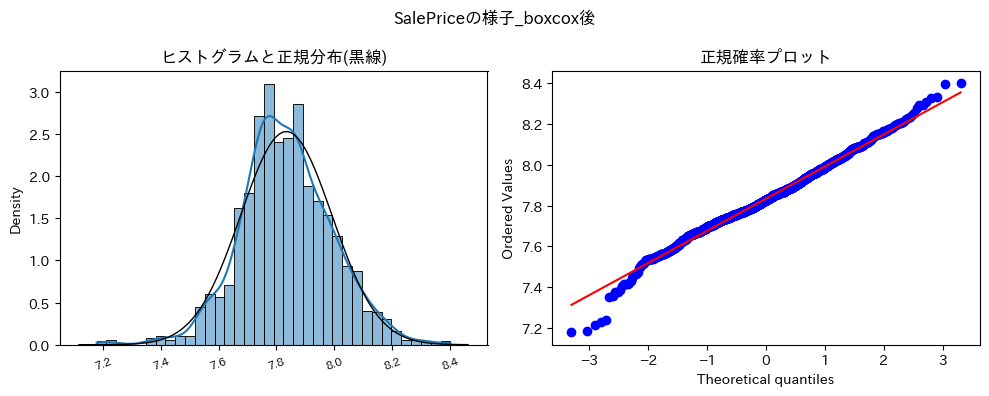

In [ ]:
# 目的変数SalePriceの数値変換(box-cox)

# まず、ここまで使ってきたdf_all_dataをdf_trainとdf_testに分割し直す
ntrain = len(df_train)

df_train = df_all_data[:ntrain]
df_test = df_all_data[ntrain:].drop(["SalePrice"], axis=1)

# 全データ、訓練データを特徴量と目的変数に分ける
df_all_data_features = df_all_data.drop(["SalePrice"], axis=1)
df_train_features = df_train.drop(["SalePrice"], axis=1)
SalePrice = df_train["SalePrice"]

print("boxcox前")
print(f"{stats.skew(SalePrice)=}")
print(f"{stats.kurtosis(SalePrice)=}")

# SalePriceに対してBox-Cox変換の実行
SalePrice_boxcox, lambda_SalePrice_boxcox = stats.boxcox(SalePrice)

# 変換後のSalePriceを新しいDataFrameに保存し、元のインデックスを保持
df_SalePrice_boxcox = pd.DataFrame(SalePrice_boxcox, index=SalePrice.index, columns=["SalePrice_boxcox"])

print("boxcox後")
print(f"{stats.skew(SalePrice_boxcox)=}")
print(f"{stats.kurtosis(SalePrice_boxcox)=}")
print("Lambda value used for transformation:", lambda_SalePrice_boxcox)

fig, ax = plt.subplots(1, 2,figsize=(10, 4))
fig.suptitle("SalePriceの様子_boxcox後")

sns.histplot(SalePrice_boxcox, stat="density", kde=True, ax=ax[0])
ax[0].set_title("ヒストグラムと正規分布(黒線)")
ax[0].tick_params(axis="x", labelsize=8, rotation=20)

xmin, xmax = ax[0].get_xlim()
x = np.linspace(xmin, xmax, 100)
y_norm = stats.norm.pdf(x, np.mean(SalePrice_boxcox), np.std(SalePrice_boxcox))
ax[0].plot(x, y_norm, "k", linewidth=1)

stats.probplot(SalePrice_boxcox, plot=ax[1])
ax[1].set_title("正規確率プロット")

plt.tight_layout()
plt.show()

In [19]:
# 特徴量の数値変換(yeo-johnson)

# 特徴量の数値変換は、bool型を除いた数値型の特徴量についてのみ行う
numeric_features = df_all_data_features.select_dtypes(include="number").columns

skewness = df_all_data_features[numeric_features].skew()
high_skew_features = skewness[skewness > 0.75].index

# yeo-johnson変換器を作成。学習
pt = PowerTransformer(method="yeo-johnson")
pt.fit(df_all_data_features[high_skew_features])
# 訓練データにyeo-johnson変換を実行
df_train_features[high_skew_features] = pt.transform(df_train_features[high_skew_features])
# テストデータにyeo-johnson変換を実行
df_test[high_skew_features] = pt.transform(df_test[high_skew_features])

# 訓練データにboxcoxしたSalePriceを結合
df_train = pd.concat([df_train_features, df_SalePrice_boxcox], axis=1)

# 3. モデル構築

## モデルのパラメータチューニング

In [20]:
import optuna
from sklearn.linear_model import Ridge, Lasso
from lightgbm import LGBMRegressor
from sklearn.model_selection import KFold
import numpy as np
from scipy import special

# データの準備
X = df_train.drop(["SalePrice_boxcox"], axis=1)
y = df_train["SalePrice_boxcox"]

# クロスバリデーション
kf = KFold(n_splits=5, shuffle=True, random_state=42)

def objective(trial, model_name):
    scores = []
    
    # モデルごとのパラメータ範囲を設定
    if model_name == 'LGBMRegressor':
        params = {
            'max_depth': trial.suggest_int('max_depth', 5, 20),
            'learning_rate': trial.suggest_float('learning_rate', 1e-4, 0.1, log=True),  # 対数スケールで探索
            'n_estimators': trial.suggest_int('n_estimators', 50, 500),
            'subsample': trial.suggest_float('subsample', 0.6, 1.0)  # 連続範囲で探索
        }
        model = LGBMRegressor(**params, verbose=-1)
    elif model_name == 'Ridge':
        params = {
            'alpha': trial.suggest_float('alpha', 1e-3, 100.0, log=True)  # 対数スケールで探索
        }
        model = Ridge(**params)
    elif model_name == 'Lasso':
        params = {
            'alpha': trial.suggest_float('alpha', 1e-5, 1.0, log=True)  # 対数スケールで探索
        }
        model = Lasso(**params, max_iter=100000)
    
    # クロスバリデーションで評価
    for fold_idx, (tr_idx, va_idx) in enumerate(kf.split(X)):
        X_tr, X_va = X.iloc[tr_idx], X.iloc[va_idx]
        y_tr, y_va = y.iloc[tr_idx], y.iloc[va_idx]
        
        model.fit(X_tr, y_tr)
        y_pred = model.predict(X_va)
        
        # 負の値を回避
        y_pred = np.maximum(y_pred, 1e-6)

        # 逆Box-Cox変換
        y_pred_inv_boxcox = special.inv_boxcox(y_pred, lambda_SalePrice_boxcox)
        y_va_inv_boxcox = special.inv_boxcox(y_va, lambda_SalePrice_boxcox)
        
        # 評価スコアをRMSEで計算
        score = rmse(np.log(y_pred_inv_boxcox), np.log(y_va_inv_boxcox))
        scores.append(score)
    
    return np.mean(scores)

# 各モデルの最適パラメータを保存する辞書
best_params_dict = {}

# モデルごとにOptunaでパラメータチューニング
for model_name in ['LGBMRegressor', 'Ridge', 'Lasso']:
    study = optuna.create_study(direction='minimize')
    study.optimize(lambda trial: objective(trial, model_name), n_trials=50)
    
    # 最適パラメータとスコアを表示
    print(f"\n{model_name}の最適パラメータ: {study.best_params}")
    print(f"最良スコア: {study.best_value}\n")
    
    # 最適パラメータを辞書に保存
    best_params_dict[model_name] = study.best_params

# 各モデルの最適パラメータが辞書に保存されていることを確認
print("各モデルの最適パラメータ一覧:")
for model_name, params in best_params_dict.items():
    print(f"{model_name}: {params}")

[I 2024-11-07 11:57:37,071] A new study created in memory with name: no-name-6b714259-a550-4af2-8f3d-32ae75fbaf7e
[I 2024-11-07 11:57:40,893] Trial 0 finished with value: 0.3776261290582884 and parameters: {'max_depth': 18, 'learning_rate': 0.00014615217466833915, 'n_estimators': 467, 'subsample': 0.9708127964915539}. Best is trial 0 with value: 0.3776261290582884.
[I 2024-11-07 11:57:44,173] Trial 1 finished with value: 0.3372611030797687 and parameters: {'max_depth': 19, 'learning_rate': 0.0004766570326790352, 'n_estimators': 444, 'subsample': 0.7453244368484632}. Best is trial 1 with value: 0.3372611030797687.
[I 2024-11-07 11:57:47,381] Trial 2 finished with value: 0.3854956879952504 and parameters: {'max_depth': 9, 'learning_rate': 0.0001149779390133383, 'n_estimators': 373, 'subsample': 0.8907275012523642}. Best is trial 1 with value: 0.3372611030797687.
[I 2024-11-07 11:57:49,482] Trial 3 finished with value: 0.3830602979610056 and parameters: {'max_depth': 10, 'learning_rate': 


LGBMRegressorの最適パラメータ: {'max_depth': 5, 'learning_rate': 0.040068618342952, 'n_estimators': 361, 'subsample': 0.9183419938365863}
最良スコア: 0.12486860496322356



[I 2024-11-07 11:59:17,030] Trial 0 finished with value: 0.11338611945290773 and parameters: {'alpha': 3.1531346678775143}. Best is trial 0 with value: 0.11338611945290773.
[I 2024-11-07 11:59:17,103] Trial 1 finished with value: 0.12376387367875699 and parameters: {'alpha': 0.004896929347310024}. Best is trial 0 with value: 0.11338611945290773.
[I 2024-11-07 11:59:17,163] Trial 2 finished with value: 0.12396487341568223 and parameters: {'alpha': 0.0015772467759068687}. Best is trial 0 with value: 0.11338611945290773.
[I 2024-11-07 11:59:17,288] Trial 3 finished with value: 0.12384543272553597 and parameters: {'alpha': 0.0034117811988037482}. Best is trial 0 with value: 0.11338611945290773.
[I 2024-11-07 11:59:17,360] Trial 4 finished with value: 0.1135726656222853 and parameters: {'alpha': 2.8331507327334604}. Best is trial 0 with value: 0.11338611945290773.
[I 2024-11-07 11:59:17,440] Trial 5 finished with value: 0.12261063990175951 and parameters: {'alpha': 0.05012145160129357}. Bes


Ridgeの最適パラメータ: {'alpha': 13.535385248525815}
最良スコア: 0.11218060786219879



[I 2024-11-07 11:59:21,247] Trial 0 finished with value: 0.11212858173439563 and parameters: {'alpha': 0.00036172508124844116}. Best is trial 0 with value: 0.11212858173439563.
[I 2024-11-07 11:59:21,454] Trial 1 finished with value: 0.11365315435781946 and parameters: {'alpha': 0.0004870581296689683}. Best is trial 0 with value: 0.11212858173439563.
[I 2024-11-07 11:59:26,014] Trial 2 finished with value: 0.11785798745913068 and parameters: {'alpha': 2.694786989953401e-05}. Best is trial 0 with value: 0.11212858173439563.
[I 2024-11-07 11:59:26,218] Trial 3 finished with value: 0.24605624796261077 and parameters: {'alpha': 0.6856269988370581}. Best is trial 0 with value: 0.11212858173439563.
[I 2024-11-07 11:59:26,337] Trial 4 finished with value: 0.16984406333370572 and parameters: {'alpha': 0.024215421554503604}. Best is trial 0 with value: 0.11212858173439563.
[I 2024-11-07 11:59:26,872] Trial 5 finished with value: 0.11135710757230013 and parameters: {'alpha': 0.000189428002643832


Lassoの最適パラメータ: {'alpha': 0.00022478163599708013}
最良スコア: 0.11118409281929631

各モデルの最適パラメータ一覧:
LGBMRegressor: {'max_depth': 5, 'learning_rate': 0.040068618342952, 'n_estimators': 361, 'subsample': 0.9183419938365863}
Ridge: {'alpha': 13.535385248525815}
Lasso: {'alpha': 0.00022478163599708013}


# 4. 提出

In [21]:
if not os.path.exists("train_test_submission"):
    os.makedirs("train_test_submission")

for model_name in ['LGBMRegressor', 'Ridge', 'Lasso']:
    params = best_params_dict[model_name]
    model = None

    if model_name == "LGBMRegressor":
        model = LGBMRegressor(**params, verbose=-1)
    elif model_name == "Ridge":
        model = Ridge(**params)
    elif model_name == "Lasso":
        model = Lasso(**params)

    # 学習・予測
    model.fit(X, y)
    pred = model.predict(df_test)
    sub_pred = special.inv_boxcox(pred, lambda_SalePrice_boxcox)
    sub_pred = np.maximum(sub_pred, 1e-6)

    # 提出データ作成
    submission = pd.DataFrame({"Id": df_test_Id, "SalePrice": sub_pred})
    submission_path = f"train_test_submission/submission_{model_name}.csv"
    submission.to_csv(submission_path, index=False)
    print(f"{model_name}の提出データが{submission_path}に出力されました。")

LGBMRegressorの提出データがtrain_test_submission/submission_LGBMRegressor.csvに出力されました。
Ridgeの提出データがtrain_test_submission/submission_Ridge.csvに出力されました。
Lassoの提出データがtrain_test_submission/submission_Lasso.csvに出力されました。
